# P2: Constraint-Based Optimization and PDDL

[Instructions are the same as last time.]

You are *highly recommended* to LaTeX your solutions to this assignment and use the 10pt, 2-column `ieeeconf` template. You can find the template [on Overleaf](https://www.overleaf.com/latex/templates/preparation-of-papers-for-ieee-sponsored-conferences-and-symposia/zfnqfzzzxghk); Overleaf is an online LaTeX editor with a free tier, so feel free to use that service to compose your writeups. It is perhaps the easiest option, particularly if you are not as familiar with LaTeX. While there is no space limit, please try to keep your plots compact so that they do not consume an enormous amount of space; mostly this helps readability (and therefore grading). You are allowed to work in small groups (2 or 3 students), but your solutions and your writeup should be your own.

With these homework assignments, I expect that your solutions will be written as if they are research papers: though the content is not "new", you should be trying to convince me through your writing that you have implemented and understand the algorithms. You should write in full sentences. When appropriate, comment on when the algorithms succeed or fail and where they are more or less effective; include numbers/metrics (quantitative) in addition to discussion (qualitative) whenever possible. Just like in a published paper, you should not include code snippets in your writeup unless it is explicitly asked for or you think it helps you explain your results or answer the question. **I will ask you to submit both the PDF of your writeup *and* a .zip file containing your code (which may be a modified form of this Jupyter notebook) on Blackboard. Unless asked, do not include code in your writeup. You should present your results well enough that I trust your implementation was sufficient.** Though it would be nice if your code were cleaned up and nicely formatted/commented, we will are only likely to run your code to evaluate partial credit or unless we are skeptical for academic integrity reasons.

You are welcome to work in small groups of 2 or 3 students, but please write your solutions independently: I would like your answers to the more conceptual questions to be in your own words, even if you discussed the answers with others.

You will be graded on your included plots and answers to conceptual questions. Your code will not be directly graded or evaluated. You can receive partial credit on pretty much everything, and I try to be a fair as possible: giving you a grade that I think reflects your level of understanding of the material. Note that while I appreciate you submitting plots that you *know* are probably not quite right, it can be hard for me to evaluate partial credit if things are not quite working; in this case, try to include in your response a guess of where you think your solution didn't work. This will help me know when to give you more credit on your responses.

## P2.1 Introduction to constraint-based Optimization

In this problem (a duplicate of much of the content from the L05 breakout session) we'll play around a bit with constraint-based optimization and some other knowledge prerequisite for your programming assignment. First, we will explore [Google's OR-Tools python package](https://developers.google.com/optimization) that has a lot of convenient utilities for solving Linear Programs (LPs) and Mixed Integer Linear Programs (MILPs).

In the following code block, I have given you a worked example that uses `ortools` to solve a MILP:

$$
\begin{split}
\text{max}\,\,\, & z = x_1 + 2 x_2 = (1, 2) \cdot (x_1, x_2) \\
 \text{s.t.}\,\,\, & x_1 \leq 3, \\
 & x_1 + x_2 \leq 5, \\
 & x_1, x_2 \geq 0
\end{split}
$$

**TASK** Run the following code block to confirm that the code works as expected:

In [ ]:
from ortools.linear_solver import pywraplp

solver = pywraplp.Solver.CreateSolver('SCIP')
infinity = solver.infinity()

# Define your variables (and their domains)
x1 = solver.NumVar(0, infinity, 'x1')
x2 = solver.NumVar(0, infinity, 'x2')

# Add the constraints and the objective
solver.Add(x1 <= 3)
solver.Add(x1 + x2 <= 5)
solver.Maximize(x1 + 2 * x2)

# Solve
status = solver.Solve()

# Print the outputs
if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print('  Objective value: ', solver.Objective().Value())
    print('  Number of variables: ', solver.NumVariables())
    for var in solver.variables():
        print(f'    {var.name()} == {var.solution_value()}')
else:
    print('The problem does not have an optimal solution.')

## P2.1.1 Implementing Some Example Programs [4 points]

**TASK** Implement the following two mixed-integer linear programs:

Program 1:
$$
\begin{split}
\text{max}\,\,\, & z = x_1 + 2 x_2 + x_4\\
 \text{s.t.}\,\,\, & x_1 + x_2 + x_3 = 3, \\
 & x_1 + x_2 + x_4 \leq 5, \\
 & x_3 \geq 1 \\
 & x_1, x_2, x_4 \geq 0
\end{split}
$$

Program 2:
$$
\begin{split}
\text{max}\,\,\, & z = 3 x_1 + 5 x_2 \\
 \text{s.t.}\,\,\, & x_1 \leq 4, \\
 & 2 x_2 \leq 12, \\
 & 3 x_1 + 2 x_2 \leq 18 \\
 & x_1, x_2 \geq 0
\end{split}
$$

**RESULTS** Include in your writeup the value of the overall objective and the values of the different variables.

In [1]:
# Program 1
from ortools.linear_solver import pywraplp
solver = pywraplp.Solver.CreateSolver('SCIP')
infinity = solver.infinity()
# Define your variables (and their domains)
x1 = solver.NumVar(0, infinity, 'x1')
x2 = solver.NumVar(0, infinity, 'x2')
x3 = solver.NumVar(1, infinity, 'x3')
x4 = solver.NumVar(0, infinity, 'x4')
# Add the constraints and the objective
solver.Add(x1+x2+x3 == 3)
solver.Add(x1+x2+x4 <= 5)
solver.Maximize(x1+2*x2+x4)
# Solve
status = solver.Solve()

# Print the outputs
if status == pywraplp.Solver.OPTIMAL:
    print('Solution of Program 1:')
    print('  Objective value: ', solver.Objective().Value())
    print('  Number of variables: ', solver.NumVariables())
    for var in solver.variables():
        print(f'    {var.name()} == {var.solution_value()}')
else:
    print('The problem does not have an optimal solution.')

Solution of Program 1:
  Objective value:  7.0
  Number of variables:  4
    x1 == 0.0
    x2 == 2.0
    x3 == 1.0
    x4 == 3.0


In [2]:
# Program 2
from ortools.linear_solver import pywraplp
solver = pywraplp.Solver.CreateSolver('SCIP')
infinity = solver.infinity()
# Define your variables (and their domains)
x1 = solver.NumVar(0, 4, 'x1')
x2 = solver.NumVar(0, 6, 'x2')
# Add the constraints and the objective
solver.Add(3*x1+2*x2 <= 18)
solver.Maximize(3*x1+5*x2)
ca# Solve
status = solver.Solve()

# Print the outputs
if status == pywraplp.Solver.OPTIMAL:
    print('Solution of Program 2:')
    print('  Objective value: ', solver.Objective().Value())
    print('  Number of variables: ', solver.NumVariables())
    for var in solver.variables():
        print(f'    {var.name()} == {var.solution_value()}')
else:
    print('The problem does not have an optimal solution.')

Solution of Program 2:
  Objective value:  36.0
  Number of variables:  2
    x1 == 2.0
    x2 == 6.0


## P2.1.2 A word problem

[Question adapted from [CMU 15.381](http://www.cs.cmu.edu/~15381-s19/assignments/written/hw2_blank.pdf)]

The Two Mines Company own two different mines that produce an ore which, after being crushed, is graded into three classes: high-, medium- and low-grade. The company has contracted to provide a smelting plant with at least 12 tons of high-grade, at least 8 tons of medium-grade and at least 24 tons of low-grade ore per week. The two mines have different operating characteristics as detailed below. Additionally, we cannot work the same mine for more than 6 days a week.


Here is a table including the costs and yields associated with running each of the two mines:

| Mine Name | Cost/day | High-grade yield / day | Medium-grade yield / day | Low-grade yield / day |
| --- | --- | --- | --- | --- |
| Heigh Ho | 180 | 3 | 5 | 4 |
| Kessel | 160 | 2 | 4 | 8 |

How many days per week should each mine be operated to fulfill the smelting plant contract while minimizing the total cost? *Note: We have (implicitly) assumed that it is permissible to work in fractions of days; it is not possible to work less than 0 days on any part of the mines.*

**QUESTION** How many variables are there in the MILP? How many constraints?

**TASK** Convert the word problem into a MILP and implement it using `ortools`.

**CODE** Include your implementation of the MILP in your writeup (if you would like, you can instead include the LaTeX equation form).

**RESULTS** Solve the MILP. Include (1) the value of the objective being minimized and (2) the value of each of the variables in your writeup.


### Define Problem
$x_1$: work days per week at Heigh Ho Mine 

$x_2$: work days per week at Kessel Mine
$$
\begin{split}
\text{min}\,\,\, & z = 180  x_1 + 160 x_2 \\
 \text{s.t.}\,\,\, & 3 x_1 + 2 x_2 \geq 12, \\
 & 5 x_1 + 4 x_2 \geq 8, \\
 & 4 x_1 + 8 x_2 \geq 24, \\
 & x_1, x_2 \geq 0 \\
 & x_1, x_2 \leq 6
\end{split}
$$

In [7]:
# Mine Problem
from ortools.linear_solver import pywraplp

solver = pywraplp.Solver.CreateSolver('SCIP')
infinity = solver.infinity()

# Define your variables (and their domains)
x1 = solver.NumVar(0, 6, 'x1')
x2 = solver.NumVar(0, 6, 'x2')
# Add the constraints and the objective
solver.Add(3*x1+2*x2 >= 12)
solver.Add(5*x1+4*x2 >= 8)
solver.Add(4*x1+8*x2 >= 24)
solver.Maximize(-180*x1-160*x2)

# Solve
status = solver.Solve()

# Print the outputs
if status == pywraplp.Solver.OPTIMAL:
    print('Solution of Mine problem:')
    print('  Objective value: ', solver.Objective().Value())
    print('  Number of variables: ', solver.NumVariables())
    for var in solver.variables():
        print(f'    {var.name()} == {var.solution_value()}')
else:
    print('The problem does not have an optimal solution.')

Solution of Mine problem:
  Objective value:  -780.0
  Number of variables:  2
    x1 == 3.000000000000001
    x2 == 1.4999999999999998


## P2.2 Trajectory Optimization with MILPs


### P2.2.1 Computing a Trajectory Given Thrusts [4 points]

Before we get to optimization, we will start by computing the trajectory of a simple 1D space vehicle given known thrusts. Given known thrusts and an initial position and velocity it is possible to compute the position and velocity of the vehicle at all times. Below, I have provided you with some starter code that provides you with `x0 = [position, velocity]` and a list of thrusts `us` at every time.

The following line of linear algebra represents the update rule between steps:

$$ x_{t+1} = A_d x_t + B_d u_t $$

**TASK** Complete the code below by replacing the `NotImplementedError` with linear algebra. See the lecture slides for more details about the geometry.

The final position is -1.375 and the final velocity is 0.0. Be sure that your implementation matches these values.

**PLOTS** Run the plotting code below your completed implementation and include the resulting plots in your writeup.

In [5]:
## Breaking down an example without optimization

import numpy as np
import matplotlib.pyplot as plt

num_steps = 100
T = 25
dt = T / num_steps

# Define the matrices
Ad = np.array([[1, dt],
               [0, 1]])
dt2 = dt*dt/2
Bd = np.array([[dt2, -dt2],
               [dt, -dt]])

# Define the starting condition & control input
x0 = [3, -2]
us = np.array([[0.2, 0]]*50 + [[0, 0]]*30 + [[0, 0.1]]*20)

# TODO: Compute each state from the initial state and the thrust values
# Output: 'xs' is expected to be a list of 'x' position/velocities over time
def solve(x0):
    x = x0
    xs = [x]
    for u in us:
        # raise NotImplementedError()
        x = Ad @ x + Bd @ u
        xs.append(x)

    return np.array(xs)

Final Position=-1.375 and Velocitiy=0.000


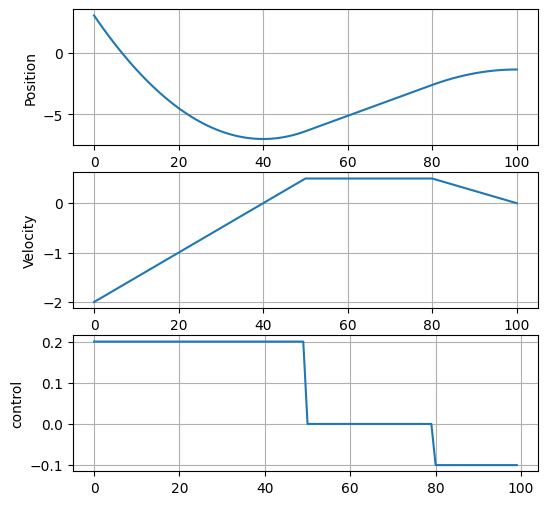

In [6]:
# Plotting Code  
xs = solve(x0)

print(f"Final Position={xs[-1, 0]:.3f} and Velocitiy={xs[-1, 1]:.3f}")

fig = plt.figure(figsize=(6, 6), dpi=100)
ax = plt.subplot(311)
ax.plot(range(len(us) + 1), xs[:, 0])
ax.set_ylabel("Position")
plt.grid()
ax = plt.subplot(312)
ax.plot(range(len(us) + 1), xs[:, 1])
ax.set_ylabel("Velocity")
plt.grid()
ax = plt.subplot(313)
ax.plot(range(len(us)), us[:, 0] - us[:, 1])
ax.set_ylabel("control")
plt.grid()

# Position check
assert abs(xs[-1, 0] + 1.375) < 1e-5
# Velocity check
assert abs(xs[-1, 1]) < 1e-5

None

### P2.2.2 Trajectory Optimization

Below, I have provided you with starter code for trajectory optimization.

**TASK** Using your solution to the previous question, resolve the NotImplementedErrors in the `build_solver` function below. *Note:* because the `us` are no longer numpy arrays, you cannot use numpy operations to perform your linear algebra operations. I have provided you with `vec_add`, `dot`, `matmul` functions that you may use in their place.

**PLOTS** Run the plotting code below and include the plots in your writeup. (There should be a total of 4.)

**QUESTION** (2–5 sentences) How does the objective value change as the number of steps change. Why?

In [4]:
# Starter Code: 2D Trajectory Optimization
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
from ortools.linear_solver import pywraplp


def vec_add(vec_a, vec_b):
    return [ai + bi for ai, bi in zip(vec_a, vec_b)]


def dot(vec_a, vec_b):
    return sum([av * bv for av, bv in zip(vec_a, vec_b)])


def matmul(mat, vec):
    return [dot(mat_r, vec) for mat_r in mat]


def get_propagation_matrices(dt):
    # Define the matrices (matrices from class)
    Ad = np.array([[1, 0, dt, 0],
         [0, 1, 0, dt],
         [0, 0, 1, 0],
         [0, 0, 0, 1]])
    dt2 = dt*dt/2
    Bd = np.array([
        [dt2, 0, -dt2, 0],
        [0, dt2, 0, -dt2],
        [dt, 0, -dt, 0],
        [0, dt, 0, -dt]])
    return Ad, Bd

def build_solver(umax, x0, T, num_steps, obstacles=[]):
    solver = pywraplp.Solver.CreateSolver('SCIP')
    infinity = solver.infinity()
    dt = T / num_steps
    Ad, Bd = get_propagation_matrices(dt)

    # Define the control variables
    us = [[solver.NumVar(0, infinity, f'u_{step}_{side}') 
           for side in range(4)]
           for step in range(num_steps)]

    # Compute each state from the initial state and the thrust values
    x = x0
    xs = [x]
    for u in us:
        x = vec_add(matmul(Ad, x), matmul(Bd, u))
        xs.append(x)

    # Add the targets for the final state and thrust
    for dim in range(4):
        solver.Add(xs[-1][dim] == 0)

    # Constraints on the amount of thrust
    [[solver.Add(u <= umax) 
        for u in u_r]
        for u_r in us]
    # constraints for the obstacles
    M = 1000
    if len(obstacles) > 0:
        for jj, obs in enumerate(obstacles):
            bs = []
            for ii in range(len(xs)-1):
                b_4 = [solver.IntVar(0, 1, f'b1_{jj}_{ii+1}'), 
                       solver.IntVar(0, 1, f'b2_{jj}_{ii+1}'),
                       solver.IntVar(0, 1, f'b3_{jj}_{ii+1}'), 
                       solver.IntVar(0, 1, f'b4_{jj}_{ii+1}')]
                bs.append(b_4)
            for ii, x in enumerate(xs[1:]):
                solver.Add(bs[ii][0]+bs[ii][1]+bs[ii][2]+bs[ii][3] <= 3)
                solver.Add(x[0]  <= obs[0] + M*bs[ii][0])
                solver.Add(-x[0]  <= -obs[1] + M*bs[ii][1])
                solver.Add(x[1]  <= obs[2] + M*bs[ii][2])
                solver.Add(-x[1] <= -obs[3] + M*bs[ii][3])


    # if len(obstacles) > 0:
    #     for ii, x in enumerate(xs[1:]):
    #         current_time = ii*dt
    #         if current_time < 20:
    #             solver.Add(x[0] >=1.5)
    solver.Minimize(dt * sum([sum(u) for u in us]))
    return solver, us


def replace_and_plot(x0, us, solver, T, num_steps, obstacles=[]):
    """Substitute solved values and plot."""
    x = np.array(x0)
    dt = T / num_steps
    Ad, Bd = get_propagation_matrices(dt)
    xsv = [x]
    usv =  [[us[step][side].solution_value() for side in range(4)] for step in range(num_steps)]
    for uv in usv:
        x = vec_add(matmul(Ad, x), matmul(Bd, uv))
        xsv.append(x)

    objective_value = solver.Objective().Value()
    print(f'Objective value = {objective_value}')

    fig, ax = plt.subplots()
    xsv = np.array(xsv)
    ax.plot(xsv[:, 0], xsv[:, 1], 'k', alpha=0.1)
    ax.scatter(xsv[:, 0], xsv[:, 1], c=list(range(num_steps+1)), s=1)
    ax.set_aspect('equal', 'box')
    
    for ob in obstacles:
        ax.add_patch(patches.Rectangle(
            (ob[0], ob[2]), ob[1] - ob[0], ob[3] - ob[2],
            linewidth=1, edgecolor='k', facecolor='none'))

    return objective_value

Objective value = 3.553571428571429
Objective value = 3.500582750582752
Objective value = 3.4968502761606186


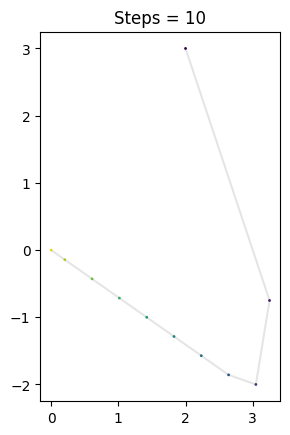

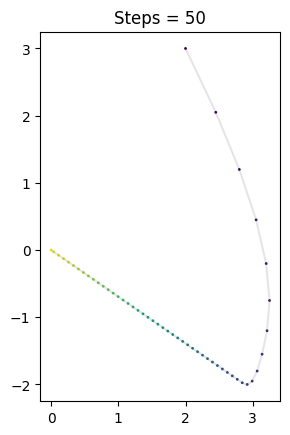

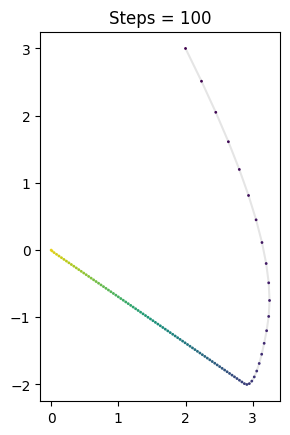

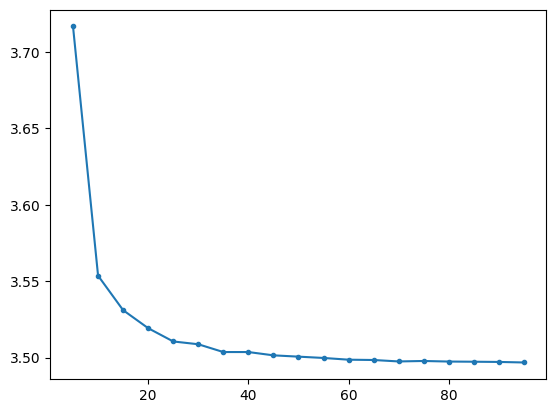

In [2]:
# Parameters
num_steps = 50
T = 25
umax = 0.4
x0 = [2, 3, 1, -2]

# Compute the result and plot (with 10 steps)
solver, us = build_solver(umax, x0, T, 10)
status = solver.Solve()
replace_and_plot(x0, us, solver, T, 10)
plt.title("Steps = 10")

# Compute the result and plot (with 50 steps)
solver, us = build_solver(umax, x0, T, 50)
status = solver.Solve()
replace_and_plot(x0, us, solver, T, 50)
plt.title("Steps = 50")

# Compute the result and plot (with 100 steps)
solver, us = build_solver(umax, x0, T, 100)
status = solver.Solve()
replace_and_plot(x0, us, solver, T, 100)
plt.title("Steps = 100")

# Comptue the optimization objective as a function of
steps = range(5, 100, 5)
objective = []
for num_steps in steps:
    solver, _ = build_solver(umax, x0, T, num_steps)
    solver.Solve()
    objective.append(solver.Objective().Value())

plt.figure()
plt.plot(steps, objective, '.-')
None

In [ ]:
### P2.2.3 Adding an obstacle

In class, we discussed how to add obstacles that the agent needed to avoid. I have provided you with a single rectangular obstacle stored as `obstacle = [xmin, xmax, ymin, ymax]`.

**TASK** Extend the `build_solver` function to accept a list of obstacles: `build_solver(umax, x0, T, num_steps, obstacles=[])`. This requires that you add additional constraints to ensure that the robot does not enter the obstacle (for all times). See the lecture slides for how to do this by adding an additional "slack variable". Also, don't forget that avoiding an obstacle needs to happen at every time step; you will need to add constraints for every `x` in `xs`. When the list of obstacles is empty, no constraints should be added.

**PLOTS** Run the plotting code below and include the plots in your writeup. (There should be a total of 4.)

**RESULTS** Also include in your writeup the objective values generated as you run the plotting code.

**CODE** Include in your writeup a block of code in which you add the obstacle constraints (you do not need to include all of `build_solver`).

Objective value = 3.846178861788643
Objective value = 0.5329970575872216
Objective value = 3.500582750582752
Objective value = 0.40816326530612257


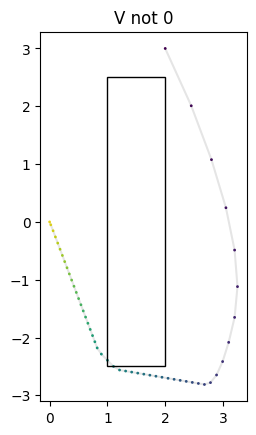

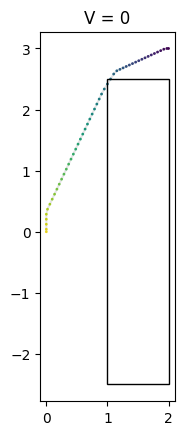

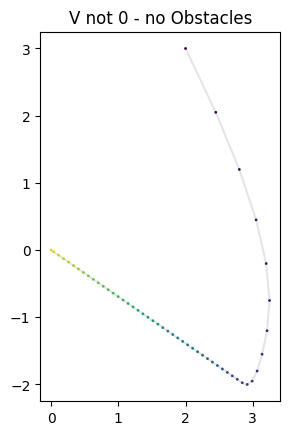

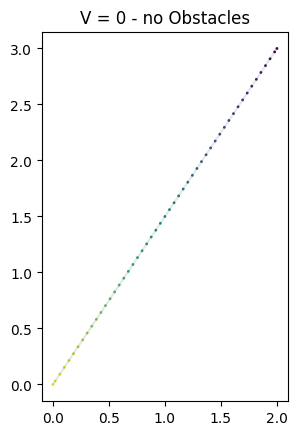

In [6]:
# Trajectory Solving (with obstacles): Results and Plotting

num_steps = 50
T = 25
umax = 0.4
x0_withV = [2, 3, 1, -2]
x0_noV = [2, 3, 0, 0]

# obstacle = [xmin, xmax, ymin, ymax]
obstacles = [[1, 2, -2.5, 2.5]]

solver, us = build_solver(umax, x0_withV, T, num_steps, obstacles)
status = solver.Solve()
replace_and_plot(x0_withV, us, solver, T, num_steps, obstacles)
plt.title("V not 0")

solver, us = build_solver(umax, x0_noV, T, num_steps, obstacles)
status = solver.Solve()
replace_and_plot(x0_noV, us, solver, T, num_steps, obstacles)
plt.title("V = 0")

solver, us = build_solver(umax, x0_withV, T, num_steps, obstacles=[])
status = solver.Solve()
replace_and_plot(x0_withV, us, solver, T, num_steps, obstacles=[])
plt.title("V not 0 - no Obstacles")

solver, us = build_solver(umax, x0_noV, T, num_steps, obstacles=[])
status = solver.Solve()
replace_and_plot(x0_noV, us, solver, T, num_steps, obstacles=[])
plt.title("V = 0 - no Obstacles")

None

## P2.3: PDDL

In class, we talked about PDDL as a language for representing task planning problems. While you won't be implementing the solver itself, in this problem you'll be using [Fast Downward](https://www.fast-downward.org/HomePage), an off-the-shelf PDDL solver.

### P2.3.1 Running Fast Downward [4 points]

To begin, I have provided you with an example PDDL domain for you to experiment with. 
I have provided you with a Dockerfile that builds the code and starts a bash session inside the container, where you can run the example code. The `pddl` folder inside the same folder that contains this jupyter notebook is mounted inside the container: you can edit those files while Docker is running and those changes will appear inside.

**TASK** Download and build Fast Downward. I have provided you with a Dockerfile that includes the installation and also includes [the Downward Benchmarks](https://github.com/aibasel/downward-benchmarks). Run `make downward` to build the code and start `bash` session inside the Docker container, where you will be running `./fast-downward.py`.

**TASK** Run the following examples code blocks [Note: The following bash commands are set up so that if you have just run `make downward`, you should be able to just paste each in your terminal.]

```bash
./fast-downward.py \
  pddl-benchmark-examples/blocks/domain.pddl \
  pddl-benchmark-examples/blocks/probBLOCKS-10-0.pddl \
  --search "astar(ipdb())"
```

```bash
./fast-downward.py \
  pddl-benchmark-examples/blocks/domain.pddl \
  pddl-benchmark-examples/blocks/probBLOCKS-10-0.pddl \
  --evaluator "hff=ff()" --search "lazy_greedy([hff], preferred=[hff])"
```

**RESULTS** For each code block, include in your writeup (1) the length of the completed plans and (2) the number of expanded states and (3) the total run time. The two different blocks are each running `astar` (optimal) and the `ff` heuristic (not optimal).

**QUESTION** (2-4 sentences) When would you prefer to use each planner? (Discuss their relative advantages.)

### P2.3.2 An Example PDDL Problem [8 points]

[Question adapted from MIT 16.412](https://ocw.mit.edu/courses/aeronautics-and-astronautics/16-412j-cognitive-robotics-spring-2016/assignments/MIT16_412JS16_Assignment4.pdf) I really loved this problem from 16.412—and in part because I enjoy Star Trek—so I've simplified it a bit and adapted it for this course.

> Scenario: Planet Levinia needs your help! As a freshly minted Starfleet Academy
graduate in charge of your own galaxy-class starship, the USS Enterprise, your first
mission has been assigned by Admiral Smailliw Nairb himself. You are to travel to the
planet Levinia, and rescue a group of civilians that are in danger from temporal
anomalies. There is a deadline though, after which you will be unable to rescue the
population.

Your mission is to reach the planet Levinia in fewer than 400 time steps. However it will take you at least 500 time steps to get there on the impulse drive and the faster-than-light "warp drive" is broken. The Enterprise requires new parts that are strewn around the system if it is to have any hope of reaching the system in time.

Here's a rough map showing the travel "distances" between the various systems (from the MIT course):
![The Final Frontier](trek_across_the_galaxy.png)

I have provided you with some starter PDDL code that implements a version of this scenario without a warp drive. You can run the code via:

```lisp
./fast-downward.py \
  pddl/impulse-space-domain.pddl \
  pddl/impulse-space-problem.pddl \
  --search "astar(ipdb())"
```

**RESULTS** Include in your writeup the actions that minimize the total cost (which you get by running the included PDDL code), 

You may want to take a look over the code before moving forward, since it will be your starter code to solve the more general problem. First, there are a number of "types" that define objects:
```lisp
(:types location locatable - object
	ship supply - locatable
	plasmaconduit plasmainjector warpcoil dilithium medicalsupply - supply)
```
The version of PDDL we are using, the type of the object limits how those objects can be used: when the arguments of an action or predicate come with a type, only objects of that type can be passed to that argument. For example, the `travel-impulse-speed` action takes `?s - ship, ?l1 - location, ?l2 - location`, which means that only a ship and two locations can be passed to it.

In the `problem` definition, I have provided you with (1) a list of objects that exist in the world and (2) an initialization, which specifies the starting configuration of all the objects.

**TASK** Implement the remainder of the scenario, in which the Enterprise picks up the . You may need the following information:

For the full task, you will need to have implemented the following actions:
- `travel-impulse-speed` Arguments: `?s - ship ?l1 - location ?l2 - location`. Description: Ship ?s moves from ?l1 to ?l2 at impulse speed; the adjacency and the travel costs are already included in the problem pddl file.
- [new] `travel-warp-speed` Arguments: `?s - ship ?l1 - location ?l2 - location`. Description: Ship ?s moves from ?l1 to ?l2 at warp speed (requiring that the warp drive is active); the adjacency and the travel costs are already included in the problem pddl file. Costs: given by `(warp-distance l1 l2)`, I've already provided you with these.
- [new] `beam-up-supplies` Arguments: `?s - ship ?l - location ?p - supply` Ship ?s at location ?l beams up supplies ?p. Once the action is complete, the supplies are onboard the ship. Requires the away team. Cost: 1.
- [new] `enable-warp-drive` Arguments: `?s - ship, ?pc - plasmaconduit, ?pi - plasmainjector, ?wc - warpcoil, ?di - dilithium`. Description: All of these supplies must be onboard ship ?s (you may want to define a new predicate for this: `on-ship`) and attached in the proper configuration. This action powers up the warp drive, enabling flight at warp speed afterwards. Cost: 3.

In addition, here is where the supplies are located (information that you should include in the `:init` block): 

|Thing | Type | Initial location|
| --- | --- | --- |
|enterprise | ship | earth|
|plasmaconduit1 |plasmaconduit |vulcan|
|plasmainjector1 |plasmainjector| betazed|
|warpcoil1 |warpcoil| qonos|
|dilithium1| dilithium| ferenginar|

You are not limited in whatever else you feel is necessary to add to solve the problem; add any predicates, functions, or other PDDL features at your discretion. 

**CODE** Include your new action definitions in your writeup. (Also make sure you include your completed domain/problem files in the zip file containing your code.)

**RESULTS** Include in your writeup the action sequence recovered by the AStar planner in Fast Downward. Also include the total path cost (and did the Enterprise make it to the planet in time?)